In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

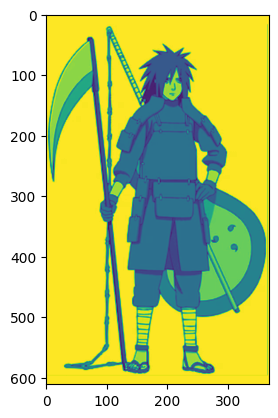

In [75]:
img = cv2.imread("test.png", 0) # here 0 means greyscale 1 means rgb channel,
original_a = len(img[0])
original_b = len(img)
plt.imshow(img)
plt.show()

In [76]:
import math

def resize_with_exact_patch_constraints(a, b, num_col_patches=80, patch_size=20, max_width=6000, max_height=6000):
    """
    Resizes the image ensuring:
    1. The number of column patches is exactly `num_col_patches`
    2. The width and height are exactly divisible by `patch_size`
    3. Aspect ratio is maintained as closely as possible
    """
    aspect_ratio = b / a  # Maintain aspect ratio correctly (Height/Width)

    # **Set the new width based on the exact number of column patches**
    resized_width = num_col_patches * patch_size  # Width = 80 patches * patch_size

    # **Compute the corresponding height while maintaining aspect ratio**
    resized_height = round(resized_width * aspect_ratio)

    # **Round height to the nearest multiple of patch_size to ensure divisibility**
    resized_height = round(resized_height / patch_size) * patch_size

    # **Ensure the resized height is within limits**
    if resized_height > max_height:
        resized_height = max_height  # Limit height
        resized_width = round(resized_height / aspect_ratio / patch_size) * patch_size  # Adjust width accordingly

    return int(resized_height), int(resized_width), patch_size

# Example usage
original_width = img.shape[1]  # Original width (columns)
original_height = img.shape[0]  # Original height (rows)

resized_b, resized_a, patch_size = resize_with_exact_patch_constraints(original_a, original_b)

print(f"Resized Dimensions: {resized_b}x{resized_a}")
print(f"Patch Size: {patch_size}")


Resized Dimensions: 2660x1600
Patch Size: 20


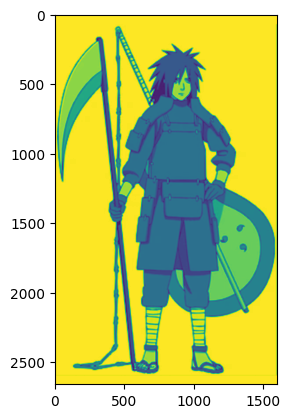

(2660, 1600)


In [77]:
resized_image = cv2.resize(img, (resized_a, resized_b))

plt.imshow(resized_image)
plt.show()
print(resized_image.shape)

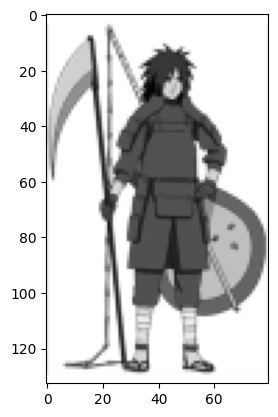

(133, 80)


In [78]:
import numpy as np
import math
import matplotlib.pyplot as plt

def process_patch(patch):
    """
    Example function to process a given image patch.
    This function can be replaced with any custom processing logic.
    """
    return round(np.sum(patch) / patch.size)

def extract_patches(image, k):
    """
    Extract k x k patches from the given image and pass each patch 
    to the processing function.
    
    Parameters:
    - image (2D numpy array): The input matrix representing the image.
    - k (int): The patch size (k x k).
    
    Returns:
    - A 2D list (matrix) of processed patch results.
    """
    a, b = image.shape  # Get the image dimensions

    # Ensure the image dimensions are divisible by k
    if a % k != 0 or b % k != 0:
        raise ValueError(f"Image dimensions ({a}x{b}) must be divisible by patch size {k}.")
    
    # Corrected initialization
    processedImage = [[0 for _ in range(b // k)] for _ in range(a // k)]
    
    # Iterate through the image in steps of k
    for i in range(0, a, k):
        for j in range(0, b, k):
            patch = image[i:i+k, j:j+k]  # Extract k x k patch
            result = process_patch(patch)  # Process the patch
            processedImage[i // k][j // k] = result  # Correct indexing

    return np.array(processedImage)


processedImage = extract_patches(resized_image, patch_size)

# Visualize the processed image
plt.imshow(processedImage, cmap='gray')
plt.show()

print(processedImage.shape)

resized_image = processedImage

In [79]:
# Read charset and clean newlines
with open("font10.txt", "r") as f:
    charset = f.read().replace("\n", "")

# Convert charset to a list of characters
arr = list(charset)

# Get dimensions of the resized image
row = resized_image.shape[1]  # Number of columns
col = resized_image.shape[0]  # Number of rows

# Initialize a 2D list for character mapping
arr2 = [[0 for _ in range(row)] for _ in range(col)]

import math 

# Map pixel values to characters
for i in range(col):
    for j in range(row):
        index = math.floor(resized_image[i][j] / (256 / 10.0))
        index = min(index, 9)  # Ensure it does not exceed array bounds
        arr2[i][j] = arr[index]

# Print the resulting character matrix
for row in arr2:
    print(" ".join(row))  # Print characters without commas or brackets


                                                                                                                                                               
                                                                                                                                                               
                                                                                                                                                               
                                                                                                                                                               
                                            : .                                                                                                                
                                          . - -                                                                                                                
                                        

In [80]:
# Convert 2D Array to String
array_string = '\n'.join([' '.join(map(str, row)) for row in arr2])


# Write to Text File
filename = "myoutput10.txt"
with open(filename, 'w') as file:
    file.write(array_string)



In [81]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont


# **Improved Image Rendering with PIL**
font_size = 26  # Adjust font size to balance width-height ratio
font_path = "usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf"  # Use a monospace font (update path if needed)

try:
    font = ImageFont.truetype(font_path, font_size)
except IOError:
    font = ImageFont.load_default()  # Fallback to default font

# **Fix Aspect Ratio for Proper Scaling**
char_width, char_height = font.getsize("A")  # Get width & height of a single character
aspect_ratio = char_height / char_width  # Aspect ratio of the font (important!)

# **Calculate image dimensions**
cols = len(arr2[0])  # Number of columns (characters per row)
rows = len(arr2)  # Number of rows

# **Apply Aspect Ratio Fix**
padding_x = 250  # Extra space on left & right
padding_y = 50  # Extra space on top & bottom
image_width = int(cols * char_width * 1.8) + padding_x  # Width scaled properly
image_height = int(rows * char_height * 1.2) + padding_y  # Height scaled with some extra space

# **Create a blank white image**
image = Image.new("RGB", (image_width, image_height), "white")
draw = ImageDraw.Draw(image)

# **Draw ASCII text with correct aspect ratio**
x_start = padding_x // 2  # Centering horizontally
y_start = padding_y // 2  # Centering vertically

y = y_start
for row in arr2:
    text = ' '.join(row)  # Add spacing between characters
    draw.text((x_start, y), text, font=font, fill="black")
    y += int(char_height * 1.2)  # Line spacing fix

# **Save image file**
image_filename = "myoutput10.png"
image.save(image_filename)

print(f" Saved fixed ASCII image as {image_filename}")


 Saved fixed ASCII image as myoutput10.png
